In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


In [3]:
dataspam = np.loadtxt("spambase/spambase.data", delimiter=",")
features_name = np.genfromtxt("spambase/spambase_variables.csv", delimiter=",", dtype="str")
features_name = features_name [:,0]
X = dataspam [: ,0:57]
y = dataspam [:,-1]

In [4]:
print(f'Il y a {len(X[y==0])} exemple pour le classe 0 et {len(X[y==1])} pour la classe 1')

Il y a 2788 exemple pour le classe 0 et 1813 pour la classe 1


In [5]:
len(X[y==1])

1813

# 2. Séparez les données en un sous-ensemble d’apprentissage, un sous-ensemble de validation et un sous-ensemble de test. Utilisez un tiers des données pour chaque sous-ensemble.

In [6]:
X,X_test,y,Y_test=train_test_split(X,y,test_size=0.33,stratify=y)
X_train,X_valid,Y_train,Y_valid=train_test_split(X,y,test_size=0.5,stratify=y)

# 3. Normalisez les données en utilisant la méthode StandardScaler, comme vu dans le TP3

In [7]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

# 4. En utilisant les ensembles d’apprentissage et de validation, déterminez la valeur optimale du paramètres C pour un SVM linéaire. Vous pouvez tester des valeurs dans l’intervalle [10−3, 102].

In [8]:
errer=[]
C=np.logspace(-3,2,20)
for c in C:
   clf=SVC(C=c,kernel='linear')
   clf.fit(X_train,Y_train)
   pred=clf.predict(X_valid)
   errer.append(mean_absolute_error(pred,Y_valid))

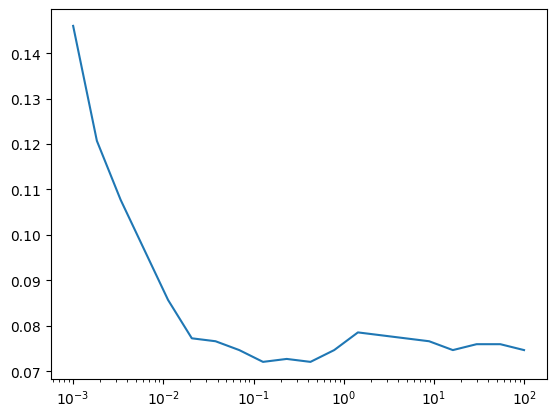

In [9]:
plt.plot(C,errer)
plt.xscale('log')

In [10]:
argminn=np.array(errer).argmin()

In [11]:
C_svm=C[argminn]

# 5. Entrainez un SVM linéaire avec la valeur optimale de C et testez-le sur l’ensemble de test. Quelle est la performance obtenue ?

In [12]:
data=np.concat([X_train,X_valid])  #fusion des données d'entrainement et ceux de validation pour entrainer le model
label=np.concat([Y_train,Y_valid])
clf=SVC(C=C_svm,kernel='linear')
clf.fit(data,label)

SVC(C=np.float64(0.12742749857031335), kernel='linear')

In [13]:
top1=clf.score(X_test,Y_test)
print(f'Le taux de bonne classification sur les données de test est {top1*100} %')

Le taux de bonne classification sur les données de test est 92.62672811059907 %


# 6. Comparez cette performance avec celle d’un modèle de regrésion logistique. Quel modèle est le plus performant ?

In [14]:
# Cherche le meilleur C pour la RegressionLogistique
errer=[]
C=np.logspace(-3,2,20)
for c in C:
   clf=LogisticRegression(penalty='l2',C=c,max_iter=200)
   clf.fit(X_train,Y_train)
   pred=clf.predict(X_valid)
   errer.append(mean_absolute_error(pred,Y_valid))

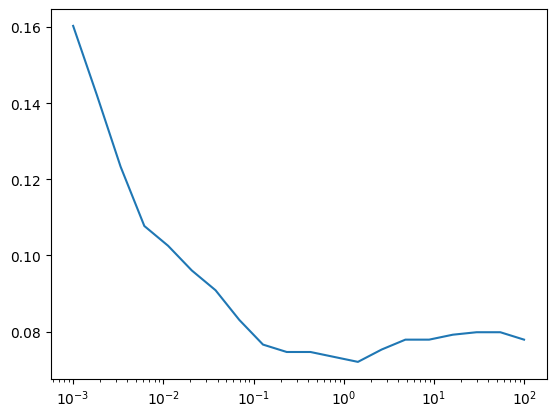

In [15]:
plt.plot(C,errer)
plt.xscale('log')

In [16]:
clf=LogisticRegression(penalty='l2',C=c)
clf.fit(data,label)

LogisticRegression(C=np.float64(100.0))

In [17]:
top1=clf.score(X_test,Y_test)
print(f'Le taux de bonne classification sur les données de test pour la regression logistique est {top1*100} %')

Le taux de bonne classification sur les données de test pour la regression logistique est 91.96840026333113 %


### Le svm est sensiblement plus performant que la regression logistique sur ce probleme

# 2 Classification multi-classe avec un SVM linéaire

In [18]:
centers = [[2.5 , 2.5], [-1, -1], [1, -1]]
stds = [0.5, 1.3, 0.6]
X, y = make_blobs(n_samples =150, centers=centers , cluster_std=stds)

## 2. Visualisez le nuage de points obtenu

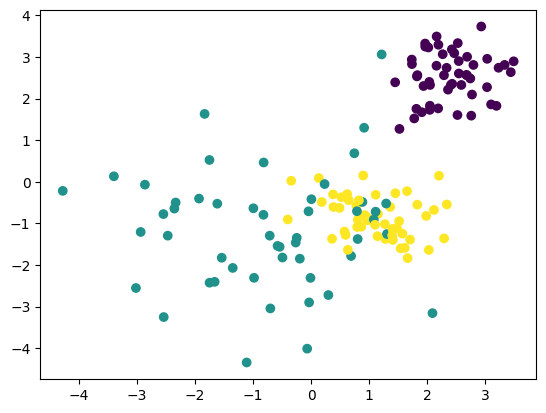

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)

## 3. Entraînez un SVM linéaire sur ces données avec la classe SVC en utilisant la paramétrisation par défaut

In [20]:
clf=SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

## 4. Visualisez les frontières de décision obtenues. Vous pouvez utiliser DecisionBoundaryDisplay

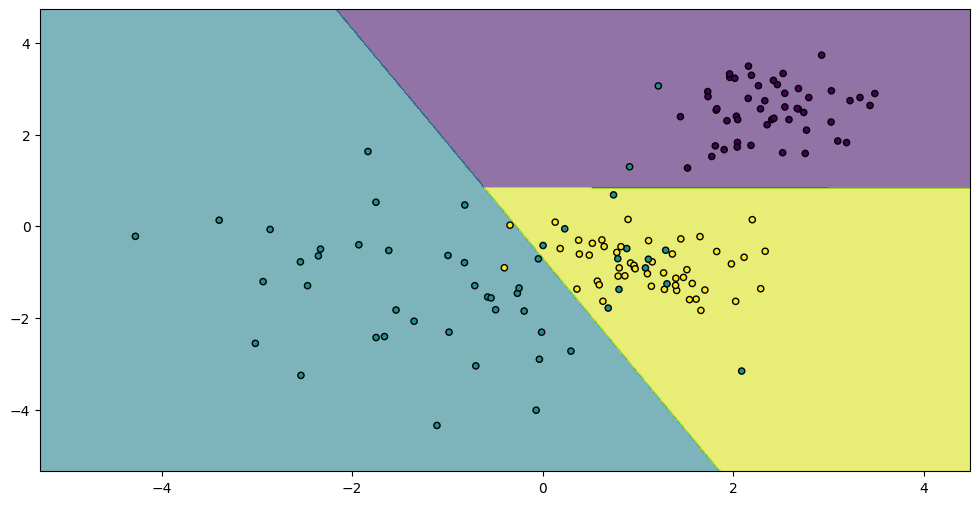

In [21]:
fig , ax = plt.subplots (1, 1, figsize =(12, 6))
disp = DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax , grid_resolution =1000 , alpha =0.6)
ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.show()

# 5. En consultant la documentation de Scikit-learn, expliquez quelle est la stratégie utilisée pour gérer la classification multi-classe

### Concernant la stratégie scikit-learn utilise one vs one d'aprés la documentation 

# 6. Testez différentes valeurs de C pour voir l’impact sur les frontières de décision

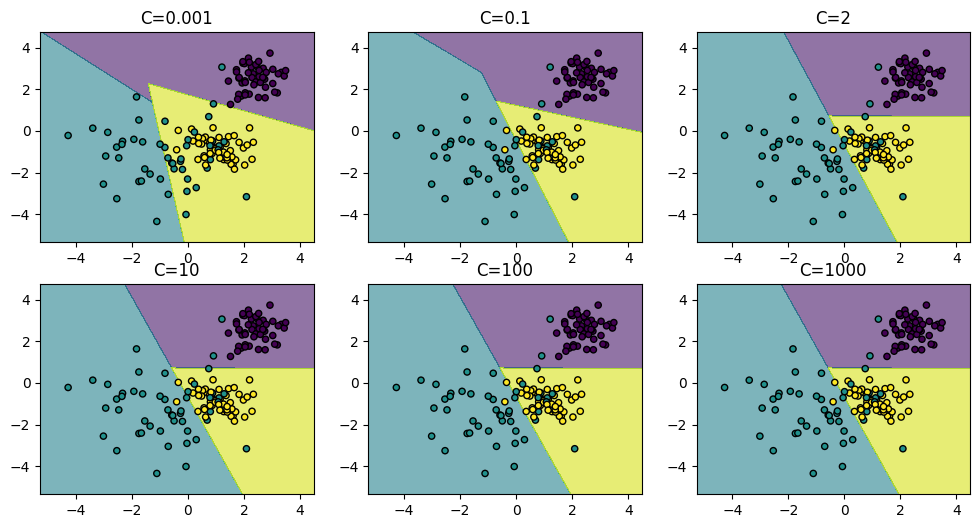

In [29]:
C=[0.001,0.1,2,10,100,1000]
fig , ax = plt.subplots (2, 3, figsize =(12, 6))
ax=ax.flatten()
for i,c in enumerate(C):
    clf=SVC(kernel='linear',C=c)
    clf.fit(X,y)  
    DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[i], grid_resolution =1000 , alpha =0.6)
    ax[i].set_title(f'C={c}')
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.show()

## On voit que la regularisation diminue la marge de certaine classe en augmente d'autre. L'augmentation de la regularisation augmente la capacité de généralisation avec de frontiére plus pertinente

# 8. Comparez les performances en généralisation d’un SVM linéaire et d’un modèle de regréssion softmax sur ces données.

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [24]:
svm=SVC(kernel='linear')
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [25]:
top1=svm.score(X_test,Y_test)
print(f'Le taux de bonne classification sur les données de test pour  est {top1*100} %')

Le taux de bonne classification sur les données de test pour  est 91.11111111111111 %


In [26]:
clf=LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [27]:
top1=clf.score(X_test,Y_test)
print(f'Le taux de bonne classification sur les données de test pour la regression logistique est {top1*100} %')

Le taux de bonne classification sur les données de test pour la regression logistique est 88.88888888888889 %


# Le SVM donne de meilleur performance en generalisation pour ce probleme que la regression logistique